In [87]:
#Load Libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [89]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [91]:
#Shape of the data
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [93]:
#Normalize data

x_train = x_train/255.0
y_train = tf.keras.utils.to_categorical(y_train)

In [95]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


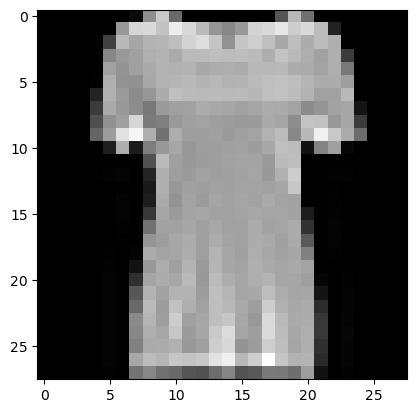

In [97]:
plt.imshow(x_train[10], cmap ='grey')
print(y_train[10])
plt.show()

In [99]:
del model

In [101]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((28,28) , name= 'InputLayer'))
model.add(tf.keras.layers.Flatten(name = 'FlatLayer'))
model.add(tf.keras.layers.Dense(512, activation = tf.keras.activations.relu, name = 'HiddenLayer1'))
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu, name = 'HiddenLayer2'))
model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax , name = 'OutputLayer'))

In [103]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["acc"])

In [105]:
model.fit(x = x_train,
          y = y_train,
          epochs = 20,
          batch_size = 64,
          validation_split = 0.1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.6453 - loss: 1.1793 - val_acc: 0.8060 - val_loss: 0.5773
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8157 - loss: 0.5585 - val_acc: 0.8300 - val_loss: 0.4919
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8359 - loss: 0.4845 - val_acc: 0.8355 - val_loss: 0.4693
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.8415 - loss: 0.4590 - val_acc: 0.8480 - val_loss: 0.4366
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.8479 - loss: 0.4418 - val_acc: 0.8517 - val_loss: 0.4244
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.8541 - loss: 0.4216 - val_acc: 0.8510 - val_loss: 0.4322
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8610 - loss: 0.4033 - val_acc: 0.8555 - val_loss: 0.4163
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8613 - loss: 0.3972 - val_acc: 0.8593 - val_loss: 0.4049
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - 

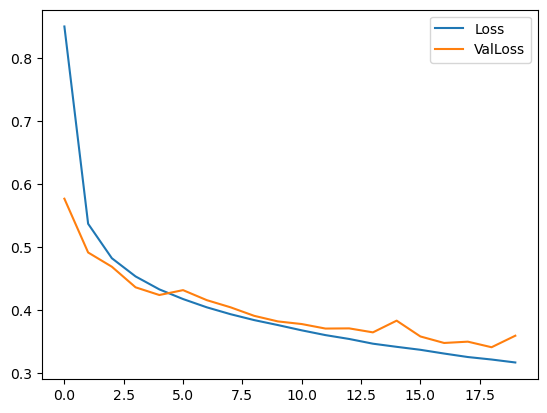

In [107]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["val_loss"], label="ValLoss")
plt.legend()

9

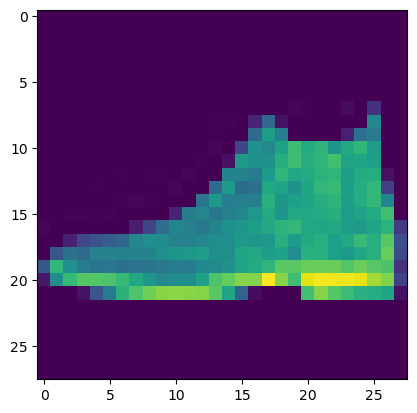

In [109]:
# Metrics
test_image = x_test[0]
plt.imshow(test_image)
y_test[0]

In [111]:
# model accepts normalized images only
test_image = test_image / 255.0

In [113]:
test_image.shape

(28, 28)

In [115]:
model.input_shape # num_of_images, height, width

(None, 28, 28)

In [117]:
# We need to add num_of_images in our test_image
test_image = np.expand_dims(test_image, axis=0)

In [119]:
test_image.shape

(1, 28, 28)

In [121]:
results = model.predict(test_image)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[1.1466621e-05, 5.4800448e-06, 3.4231412e-05, 4.9018196e-05,
        1.5926327e-05, 8.0923244e-02, 8.5751439e-05, 5.4934390e-02,
        1.3596519e-03, 8.6258090e-01]], dtype=float32)

In [123]:
results.max()

0.8625809

In [125]:
np.argmax(results) # return the position at which max prob resides

9

In [127]:
def predict_func(image):
  # plt.imshow(image)
  image = image / 255.0
  image = np.expand_dims(image, axis=0)
  results = model.predict(image)
  return np.argmax(results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Text(0.5, 1.0, 'Actual: 2 & Predicted: 2')

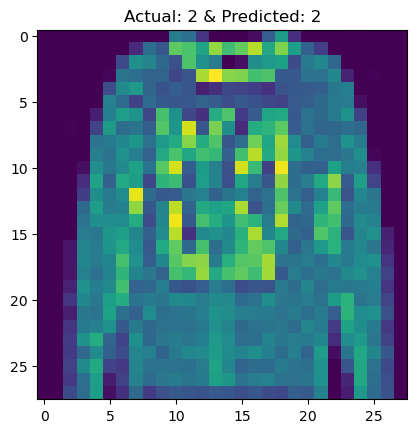

In [129]:
plt.imshow(x_test[500])
result = predict_func(x_test[500])
plt.title(f"Actual: {y_test[500]} & Predicted: {result}")

In [131]:
x_test_v2 = x_test / 255.0

In [133]:
x_test_v2.shape

(10000, 28, 28)

In [135]:
model.output_shape

(None, 10)

In [137]:
result = model.predict(x_test_v2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [139]:
result.shape

(10000, 10)

In [141]:
y_pred = np.argmax(result, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [143]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [145]:
(y_pred == y_test).mean()

0.8609

In [147]:
score = pd.DataFrame()
score['y_pred'] = y_pred
score['y_test'] = y_test

In [151]:
score

,y_pred,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [153]:
import sklearn

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [159]:
accuracy_score(y_test, y_pred)

0.8609

In [161]:
confusion_matrix(y_test, y_pred)

array([[776,   0,   9,  37,   2,   1, 165,   0,  10,   0],
       [  3, 966,   0,  24,   2,   0,   4,   0,   1,   0],
       [ 11,   2, 724,  13,  88,   0, 159,   0,   3,   0],
       [ 21,   9,   6, 883,  33,   0,  42,   0,   6,   0],
       [  0,   1,  81,  33, 709,   1, 171,   0,   4,   0],
       [  0,   0,   0,   1,   0, 962,   0,  24,   2,  11],
       [101,   1,  60,  35,  34,   0, 756,   0,  13,   0],
       [  0,   0,   0,   0,   0,  39,   0, 925,   0,  36],
       [  3,   1,   4,   8,   2,   3,  16,   5, 958,   0],
       [  0,   0,   0,   0,   0,  14,   1,  35,   0, 950]], dtype=int64)

In [165]:
class_dict = {
  0:	"T-shirt/top",
  1:	"Trouser",
  2:	"Pullover",
  3:  "Dress",
  4:	"Coat",
  5:	"Sandal",
  6:	"Shirt",
  7:	"Sneaker",
  8:	"Bag",
  9:	"Ankle boot"
}

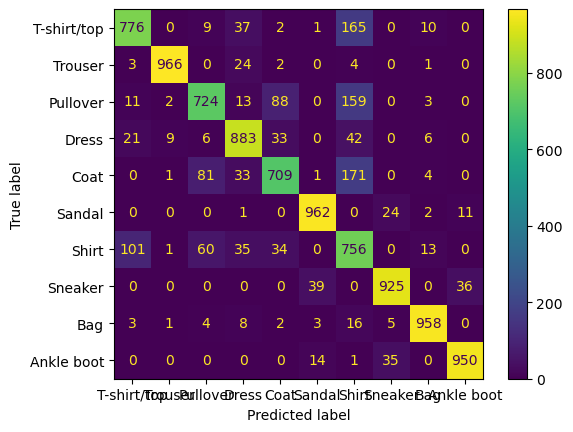

In [167]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=class_dict.values()).plot()

In [169]:
model.evaluate(x_test, tf.keras.utils.to_categorical(y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8467 - loss: 56.3401


[58.74210739135742, 0.8414999842643738]

In [171]:
score.loc[score.y_pred != y_test]

,y_pred,y_test
12,5,7
17,2,4
23,5,9
25,2,4
40,0,6
...,...,...
9972,6,2
9977,0,6
9979,0,6
9985,1,2


In [173]:
score.loc[score.y_pred != y_test].index

Index([  12,   17,   23,   25,   40,   42,   49,   50,   51,   57,
       ...
       9949, 9953, 9954, 9955, 9961, 9972, 9977, 9979, 9985, 9989],
      dtype='int64', length=1391)

Text(0.5, 1.0, 'Actual: Ankle boot & Predicted: Sandal')

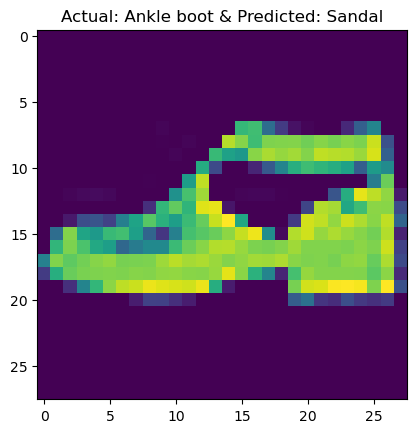

In [177]:
num = 23
plt.imshow(x_test[num])
plt.title(f"Actual: {class_dict[score.loc[num, 'y_test']]} & Predicted: {class_dict[score.loc[num, 'y_pred']]}")

In [179]:
from sklearn.metrics import classification_report

In [181]:
print(classification_report(y_test, y_pred,
                            target_names=list(class_dict.values())
                            ))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.78      0.81      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.72      0.77      1000
       Dress       0.85      0.88      0.87      1000
        Coat       0.81      0.71      0.76      1000
      Sandal       0.94      0.96      0.95      1000
       Shirt       0.58      0.76      0.65      1000
     Sneaker       0.94      0.93      0.93      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

